In [1]:
import pandas as pd 
pd.set_option('max_columns', None)
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import math
from scipy.stats import pearsonr
import os

In [2]:
households = pd.read_csv('/Users/weijilim/Downloads/csv/hhpub.csv')
NY_households = households[households['HHSTATE'] == 'NY']
NY_households

,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,WALK,BIKE,CAR,TAXI,BUS,TRAIN,PARA,PRICE,PLACE,WALK2SAVE,BIKE2SAVE,PTRANS,HHRELATD,DRVRCNT,CNTTDHH,HHSTATE,HHSTFIPS,NUMADLT,YOUNGCHILD,WRKCOUNT,TDAYDATE,HHRESP,LIF_CYC,MSACAT,MSASIZE,RAIL,URBAN,URBANSIZE,URBRUR,SCRESP,CENSUS_D,CENSUS_R,CDIVMSAR,HH_RACE,HH_HISP,HH_CBSA,RESP_CNT,WEBUSE17,SMPLSRCE,WTHHFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
2,30000012,5,3,1,1,2,10,1,1,3,2,5,1,5,4,4,5,2,1,2,3,5,2,1,9,NY,36,1,0,1,201607,1,1,3,3,2,1,3,1,1,2,1,23,1,2,XXXXX,1,1,2,79.419586,C,80,17000,17000,5000,60,17000,7000
8,30000082,3,3,2,4,2,8,1,1,5,-9,5,1,5,5,5,5,3,3,5,5,5,1,2,12,NY,36,2,2,2,201605,1,4,3,3,2,1,3,1,1,2,1,23,1,2,XXXXX,4,1,2,1148.809332,T,20,1500,300,750,30,750,300
15,30000130,1,1,1,2,1,5,-9,1,-9,-9,-9,-1,-9,1,1,-9,1,1,1,-9,1,1,2,4,NY,36,2,0,2,201605,1,2,1,5,1,1,5,1,1,2,1,21,1,2,35620,2,1,1,3829.959655,U,60,30000,17000,5000,70,30000,17000
39,30000380,2,3,2,3,1,3,1,1,2,-9,-9,1,4,4,-9,-9,1,-9,-9,-9,-9,1,2,18,NY,36,2,0,1,201610,1,6,3,1,2,1,1,1,1,2,1,23,1,2,XXXXX,3,1,2,370.744472,S,50,3000,1500,1500,50,3000,1500
44,30000434,7,3,1,2,2,8,1,1,3,1,2,1,5,5,4,5,-9,2,2,3,3,1,2,6,NY,36,2,0,2,201605,1,2,3,2,2,4,6,2,1,2,1,23,1,2,XXXXX,2,1,2,101.472420,R,30,1500,750,750,30,750,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129645,40793685,1,3,1,2,1,5,2,1,1,-9,-9,1,-9,-9,-9,-9,4,4,4,4,4,1,2,5,NY,36,2,0,0,201703,1,10,3,2,2,1,1,1,1,2,1,23,1,2,XXXXX,2,1,2,84.081993,T,40,1500,750,750,30,1500,750
129651,40793808,7,3,1,3,3,7,1,1,3,1,4,1,5,4,5,5,3,3,3,3,3,1,2,16,NY,36,2,0,2,201612,2,8,3,1,2,1,1,1,1,2,1,23,1,2,XXXXX,3,1,2,141.856476,C,50,7000,3000,3000,50,3000,3000
129662,40793974,3,3,2,1,1,3,1,5,5,2,5,1,5,5,5,5,1,2,3,3,3,2,1,7,NY,36,1,0,0,201701,1,9,3,1,2,1,1,1,1,2,1,23,1,2,XXXXX,1,1,2,15.543410,R,20,300,300,150,20,300,50
129668,40794020,3,4,1,2,4,8,1,5,5,4,5,1,5,4,5,5,2,2,5,5,5,1,2,11,NY,36,2,0,0,201702,1,10,4,6,2,4,6,2,1,2,1,24,1,2,XXXXX,2,1,2,72.789109,R,5,50,50,25,5,50,50


In [3]:
NY_HH_IDS = NY_households['HOUSEID'].values.tolist()

In [4]:
personal = pd.read_csv('/Users/weijilim/Downloads/csv/perpub.csv')
# filter to NY Households 
NY_personal = personal[personal['HOUSEID'].isin(NY_HH_IDS)]
NY_personal

,HOUSEID,PERSONID,R_AGE,EDUC,R_HISP,R_RELAT,R_SEX,R_RACE,PRMACT,PAYPROF,GT1JBLWK,WRK_HOME,WKFTPT,WRKTRANS,LSTTRDAY17,OCCAT,SCHTYP,NWALKTRP,WALK4EX,NBIKETRP,BIKE4EX,BIKESHARE,PTUSED,MCUSED,CARSHARE,RIDESHARE,CARRODE,TIMETOWK,NOCONG,PUBTIME,WRKTIME,WKRMHM,FLEXTIME,WKFMHMXX,SCHTRN1,SCHTRN2,DELIVER,MEDCOND,MEDCOND6,HEALTH,PHYACT,VPACT,LPACT,BORNINUS,YRTOUS,YEARMILE,PROXY,WHOPROXY,USEPUBTR,SAMEPLC,W_NONE,W_CANE,W_WLKR,W_WHCANE,W_DOG,W_CRUTCH,W_SCOOTR,W_CHAIR,W_MTRCHR,WORKER,DIARY,OUTCNTRY,FRSTHM17,CNTTDTR,GCDWORK,WKSTFIPS,DRIVER,OUTOFTWN,DISTTOWK17,DISTTOSC17,R_AGE_IMP,R_SEX_IMP,ALT_16,ALT_23,ALT_45,WALK_DEF,WALK_GKQ,BIKE_DFR,BIKE_GKP,CONDTRAV,CONDRIDE,CONDNIGH,CONDRIVE,CONDPUB,CONDSPEC,CONDTAX,TRAVDAY,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,DRVRCNT,HHSTATE,HHSTFIPS,NUMADLT,WRKCOUNT,TDAYDATE,HHRESP,LIF_CYC,MSACAT,MSASIZE,RAIL,URBAN,URBANSIZE,URBRUR,CENSUS_D,CENSUS_R,CDIVMSAR,HH_RACE,HH_HISP,HH_CBSA,SMPLSRCE,WTPERFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
5,30000012,1,45,5,2,1,2,1,1,-1,2,2,1,3,-1,4,-1,6,6,0,-1,-1,0,-1,0,0,1,30,12,-1,07:30 AM,2,2,-1,-1,-1,5,2,-1,2,3,7,-1,1,-1,17000,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,9,4.60,36,1,2,6.82,-9.00,45,2,3,1,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,5,1,1,2,10,1,NY,36,1,1,201607,1,1,3,3,2,1,3,1,2,1,23,1,2,XXXXX,2,58.966275,C,80,17000,17000,5000,60,17000,7000
16,30000082,1,39,5,2,1,2,1,1,-1,2,2,1,3,-1,2,-1,3,2,0,-1,-1,0,-1,0,0,1,4,3,-1,08:30 AM,1,1,2,-1,-1,3,2,-1,2,2,-1,2,1,-1,8000,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,5,1.04,36,1,2,1.65,-9.00,39,2,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,2,4,2,8,2,NY,36,2,2,201605,1,4,3,3,2,1,3,1,2,1,23,1,2,XXXXX,2,1028.814768,T,20,1500,300,750,30,750,300
17,30000082,2,38,4,2,2,1,1,1,-1,2,2,1,3,-1,4,-1,0,-1,0,-1,-1,0,-1,0,0,1,42,36,-1,08:45 AM,1,2,2,-1,-1,5,2,-1,2,2,-1,2,1,-1,15000,1,2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,7,24.35,36,1,2,30.04,-9.00,38,1,3,1,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,2,4,2,8,2,NY,36,2,2,201605,1,4,3,3,2,1,3,1,2,1,23,1,2,XXXXX,2,1296.339345,T,20,1500,300,750,30,750,300
27,30000130,1,45,5,2,1,2,1,1,-1,2,2,1,11,-1,2,-1,5,5,0,-1,-1,20,-1,0,0,-9,60,-1,10,09:00 AM,2,2,-1,-1,-1,0,2,-1,3,2,-1,5,2,1995,-88,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,4,9.65,36,1,2,14.60,-9.00,45,2,3,4,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,5,2,NY,36,2,2,201605,1,2,1,5,1,1,5,1,2,1,21,1,2,35620,1,3705.493904,U,60,30000,17000,5000,70,30000,17000
28,30000130,2,45,4,2,2,1,1,1,-1,2,2,1,11,2,2,-1,6,6,0,-1,-1,5,-1,0,0,-9,60,-1,15,09:00 AM,2,2,-1,-1,-1,0,2,-1,2,3,6,-1,2,1995,6000,2,1,2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,2,1,0,11.95,36,1,2,20.22,-9.00,45,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,5,2,NY,36,2,2,201605,1,2,1,5,1,1,5,1,2,1,21,1,2,35620,1,4361.900229,U,60,30000,17000,5000,70,30000,17000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264145,40793808,3,17,1,2,3,1,1,5,2,-1,-1,-1,-1,-1,-1,1,7,0,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,3,3,0,2,-1,1,2,-1,2,1,-1,-1,1,3,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,5,-9.00,-9,2,2,-9.00,2.17,17,1,4,4,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,7,1,3,3,7,2,NY,36,2,2,201612,2,8,3,1,2,1,1,1,2,1,23,1,2,XXXXX,2,106.020502,C,50,7000,3000,3000,50,3000,3000
264167,40793974,1,81,2,2,1,1,1,6,2,-1,-1,-1,-1,-1,-1,-1,0,-1,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,-1,2,2,-1,3,1,-1,9000,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,7,-9.00,-9,1,2,-9.00,-9.00,81,1,2,1,4,-1,-1,-1,-1,2,2,1,2,2,2,2,3,2,1,1,3,1,NY,36,1,0,201701,1,9,3,1,2,1,1,1,2,1,23,1,2,XXXXX,2,14.522639,R,20,300,300,150,20,300,50
264175,40794020,1,75,3,2,1,1,1,6,2,-1,-1,-1,-1,-1,-1,-1,7,0,0,-1,-1,0,

In [5]:
#define function 
import seaborn as sns
def cat_col_prop(data, col):
    print(pd.concat([data[col].value_counts(),
          data[col].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage')))

    sns.countplot(data[col], order =  data[col].value_counts().index)

## Removal of features mentioned in the Household Analysis

For the 1st round of dropping, columns that was mentioned previously to be dropped will be dropped first. In addition, those features that were previously in the household set will be dropped as well.

In [6]:
cleaned_person = NY_personal.drop(columns=['CENSUS_D', 'CENSUS_R', 'HBHTNRNT', 'HBHUR', 'HBPPOPDN', 'HBRESDN', 'HHRESP', 'HHSTATE','HTEEMPDN','HH_HISP','HHSTFIPS','RAIL','HTHTNRNT', 'HTPPOPDN', 'HTRESDN','R_HISP','R_RACE','URBAN','URBANSIZE','URBRUR','R_RELAT','CDIVMSAR','HH_RACE','HOMEOWN','LIF_CYC','BORNINUS','HHRESP','WRKCOUNT','NUMADLT','WHOPROXY','USEPUBTR','PROXY'])
cleaned_person


,HOUSEID,PERSONID,R_AGE,EDUC,R_SEX,PRMACT,PAYPROF,GT1JBLWK,WRK_HOME,WKFTPT,WRKTRANS,LSTTRDAY17,OCCAT,SCHTYP,NWALKTRP,WALK4EX,NBIKETRP,BIKE4EX,BIKESHARE,PTUSED,MCUSED,CARSHARE,RIDESHARE,CARRODE,TIMETOWK,NOCONG,PUBTIME,WRKTIME,WKRMHM,FLEXTIME,WKFMHMXX,SCHTRN1,SCHTRN2,DELIVER,MEDCOND,MEDCOND6,HEALTH,PHYACT,VPACT,LPACT,YRTOUS,YEARMILE,SAMEPLC,W_NONE,W_CANE,W_WLKR,W_WHCANE,W_DOG,W_CRUTCH,W_SCOOTR,W_CHAIR,W_MTRCHR,WORKER,DIARY,OUTCNTRY,FRSTHM17,CNTTDTR,GCDWORK,WKSTFIPS,DRIVER,OUTOFTWN,DISTTOWK17,DISTTOSC17,R_AGE_IMP,R_SEX_IMP,ALT_16,ALT_23,ALT_45,WALK_DEF,WALK_GKQ,BIKE_DFR,BIKE_GKP,CONDTRAV,CONDRIDE,CONDNIGH,CONDRIVE,CONDPUB,CONDSPEC,CONDTAX,TRAVDAY,HHSIZE,HHVEHCNT,HHFAMINC,DRVRCNT,TDAYDATE,MSACAT,MSASIZE,HH_CBSA,SMPLSRCE,WTPERFIN
5,30000012,1,45,5,2,1,-1,2,2,1,3,-1,4,-1,6,6,0,-1,-1,0,-1,0,0,1,30,12,-1,07:30 AM,2,2,-1,-1,-1,5,2,-1,2,3,7,-1,-1,17000,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,9,4.60,36,1,2,6.82,-9.00,45,2,3,1,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,5,1,2,10,1,201607,3,3,XXXXX,2,58.966275
16,30000082,1,39,5,2,1,-1,2,2,1,3,-1,2,-1,3,2,0,-1,-1,0,-1,0,0,1,4,3,-1,08:30 AM,1,1,2,-1,-1,3,2,-1,2,2,-1,2,-1,8000,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,5,1.04,36,1,2,1.65,-9.00,39,2,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,4,2,8,2,201605,3,3,XXXXX,2,1028.814768
17,30000082,2,38,4,1,1,-1,2,2,1,3,-1,4,-1,0,-1,0,-1,-1,0,-1,0,0,1,42,36,-1,08:45 AM,1,2,2,-1,-1,5,2,-1,2,2,-1,2,-1,15000,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,7,24.35,36,1,2,30.04,-9.00,38,1,3,1,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,4,2,8,2,201605,3,3,XXXXX,2,1296.339345
27,30000130,1,45,5,2,1,-1,2,2,1,11,-1,2,-1,5,5,0,-1,-1,20,-1,0,0,-9,60,-1,10,09:00 AM,2,2,-1,-1,-1,0,2,-1,3,2,-1,5,1995,-88,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,4,9.65,36,1,2,14.60,-9.00,45,2,3,4,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,1,5,2,201605,1,5,35620,1,3705.493904
28,30000130,2,45,4,1,1,-1,2,2,1,11,2,2,-1,6,6,0,-1,-1,5,-1,0,0,-9,60,-1,15,09:00 AM,2,2,-1,-1,-1,0,2,-1,2,3,6,-1,1995,6000,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,2,1,0,11.95,36,1,2,20.22,-9.00,45,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,1,5,2,201605,1,5,35620,1,4361.900229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264145,40793808,3,17,1,1,5,2,-1,-1,-1,-1,-1,-1,1,7,0,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,3,3,0,2,-1,1,2,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,5,-9.00,-9,2,2,-9.00,2.17,17,1,4,4,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,7,3,3,7,2,201612,3,1,XXXXX,2,106.020502
264167,40793974,1,81,2,1,6,2,-1,-1,-1,-1,-1,-1,-1,0,-1,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,-1,2,2,-1,3,-1,9000,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,7,-9.00,-9,1,2,-9.00,-9.00,81,1,2,1,4,-1,-1,-1,-1,2,2,1,2,2,2,2,3,1,1,3,1,201701,3,1,XXXXX,2,14.522639
264175,40794020,1,75,3,1,6,2,-1,-1,-1,-1,-1,-1,-1,7,0,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,-1,2,2,-1,4,-1,7000,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,6,-9.00,-9,1,2,-9.00,-9.00,75,1,4,1,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,2,4,8,2,201702,4,6,XXXXX,2,58.188893
264176,40794020,2,70,2,2,6,2,-1,-1,-1,-1,-1,-1,-1,7,0,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,4,2,-1,3,2,-1,7,-1,13000,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,1,2,1,5,-9.00,-9,1,2,-9.00,-9.00,70,2,4,1,4,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,2,4,8,2,201702,4,6,XXXXX,2,62.285639


In [7]:
# features relating to trip diary or a trip component
# for this, features relating to trip diary will be dropped as well.
# in addition, questions relating to a trip component will be dropped

cleaned_person = cleaned_person.drop(columns=['SMPLSRCE','SAMEPLC','HHFAMINC','HHVEHCNT','BIKE_DFR','BIKE_GKP','DIARY','DRIVER','DRVRCNT','OUTCNTRY','OUTOFTWN','PAYPROF','PRMACT','TDAYDATE','WALK4EX','WALK_DEF','WALK_GKQ','YEARMILE','YRTOUS','WTPERFIN','DELIVER','DRVRCNT','LSTTRDAY17','FRSTHM17','MSACAT','MSASIZE','HH_CBSA'])


## Metrics on Medical Condition - COND series, W Series, Health
There are some questions on the medical status of the households. This can be further explored. For the mode of medical device used, it is not useful so it will be dropped.

In [8]:
cleaned_person = cleaned_person.drop(columns=['W_CANE','W_CHAIR','W_CRUTCH','W_DOG', 'W_MTRCHR','W_NONE','W_SCOOTR','W_WHCANE','W_WLKR'])   



    counts  percentage
-1   29831   86.396548
 2    3408    9.870250
 1    1288    3.730306
-9       1    0.002896
    counts  percentage
-1   29831   86.396548
 2    4413   12.780931
 1     283    0.819625
-9       1    0.002896
    counts  percentage
 2   31106   90.089203
 1    3403    9.855769
-8      10    0.028962
-7       9    0.026066


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


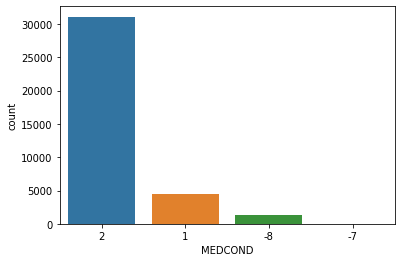

In [9]:
cat_col_prop(cleaned_person,'CONDNIGH')
cat_col_prop(cleaned_person,'CONDSPEC')
cat_col_prop(cleaned_person,'MEDCOND')

In [12]:
# most of the COND are skewed to skipping, which is reasonable 
# drop these features

#cleaned_person = cleaned_person.drop(columns=['CONDNIGH','CONDPUB','CONDRIDE','CONDRIVE', 'CONDSPEC','CONDTAX','CONDTRAV','MEDCOND6','MEDCOND'])   


In [13]:
cleaned_person = cleaned_person.drop(columns=[])

,HOUSEID,PERSONID,R_AGE,EDUC,R_SEX,GT1JBLWK,WRK_HOME,WKFTPT,WRKTRANS,OCCAT,SCHTYP,NWALKTRP,NBIKETRP,BIKE4EX,BIKESHARE,PTUSED,MCUSED,CARSHARE,RIDESHARE,CARRODE,TIMETOWK,NOCONG,PUBTIME,WRKTIME,WKRMHM,FLEXTIME,WKFMHMXX,SCHTRN1,SCHTRN2,HEALTH,PHYACT,VPACT,LPACT,WORKER,CNTTDTR,GCDWORK,WKSTFIPS,DISTTOWK17,DISTTOSC17,R_AGE_IMP,R_SEX_IMP,ALT_16,ALT_23,ALT_45,TRAVDAY,HHSIZE
5,30000012,1,45,5,2,2,2,1,3,4,-1,6,0,-1,-1,0,-1,0,0,1,30,12,-1,07:30 AM,2,2,-1,-1,-1,2,3,7,-1,1,9,4.60,36,6.82,-9.00,45,2,3,1,3,5,1
16,30000082,1,39,5,2,2,2,1,3,2,-1,3,0,-1,-1,0,-1,0,0,1,4,3,-1,08:30 AM,1,1,2,-1,-1,2,2,-1,2,1,5,1.04,36,1.65,-9.00,39,2,1,1,2,3,4
17,30000082,2,38,4,1,2,2,1,3,4,-1,0,0,-1,-1,0,-1,0,0,1,42,36,-1,08:45 AM,1,2,2,-1,-1,2,2,-1,2,1,7,24.35,36,30.04,-9.00,38,1,3,1,3,3,4
27,30000130,1,45,5,2,2,2,1,11,2,-1,5,0,-1,-1,20,-1,0,0,-9,60,-1,10,09:00 AM,2,2,-1,-1,-1,3,2,-1,5,1,4,9.65,36,14.60,-9.00,45,2,3,4,2,1,2
28,30000130,2,45,4,1,2,2,1,11,2,-1,6,0,-1,-1,5,-1,0,0,-9,60,-1,15,09:00 AM,2,2,-1,-1,-1,2,3,6,-1,1,0,11.95,36,20.22,-9.00,45,1,-1,-1,-1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264145,40793808,3,17,1,1,-1,-1,-1,-1,-1,1,7,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,3,3,1,2,-1,2,2,5,-9.00,-9,-9.00,2.17,17,1,4,4,4,7,3
264167,40793974,1,81,2,1,-1,-1,-1,-1,-1,-1,0,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,-1,3,2,7,-9.00,-9,-9.00,-9.00,81,1,2,1,4,3,1
264175,40794020,1,75,3,1,-1,-1,-1,-1,-1,-1,7,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,-1,4,2,6,-9.00,-9,-9.00,-9.00,75,1,4,1,4,3,2
264176,40794020,2,70,2,2,-1,-1,-1,-1,-1,-1,7,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,2,-1,7,2,5,-9.00,-9,-9.00,-9.00,70,2,4,1,4,3,2


In [15]:
# drop those that are being checked by jiaqi
cleaned_person = cleaned_person.drop(columns=['BIKESHARE', 'CARRODE','CARSHARE','CNTTDTR','DISTTOSC17','FLEXTIME','GT1JBLWK','HEALTH','MCUSED','NBIKETRP','WKFMHMXX'])

In [16]:
cleaned_person

,HOUSEID,PERSONID,R_AGE,EDUC,R_SEX,WRK_HOME,WKFTPT,WRKTRANS,OCCAT,SCHTYP,NWALKTRP,BIKE4EX,PTUSED,RIDESHARE,TIMETOWK,NOCONG,PUBTIME,WRKTIME,WKRMHM,SCHTRN1,SCHTRN2,PHYACT,VPACT,LPACT,WORKER,GCDWORK,WKSTFIPS,DISTTOWK17,R_AGE_IMP,R_SEX_IMP,ALT_16,ALT_23,ALT_45,TRAVDAY,HHSIZE
5,30000012,1,45,5,2,2,1,3,4,-1,6,-1,0,0,30,12,-1,07:30 AM,2,-1,-1,3,7,-1,1,4.60,36,6.82,45,2,3,1,3,5,1
16,30000082,1,39,5,2,2,1,3,2,-1,3,-1,0,0,4,3,-1,08:30 AM,1,-1,-1,2,-1,2,1,1.04,36,1.65,39,2,1,1,2,3,4
17,30000082,2,38,4,1,2,1,3,4,-1,0,-1,0,0,42,36,-1,08:45 AM,1,-1,-1,2,-1,2,1,24.35,36,30.04,38,1,3,1,3,3,4
27,30000130,1,45,5,2,2,1,11,2,-1,5,-1,20,0,60,-1,10,09:00 AM,2,-1,-1,2,-1,5,1,9.65,36,14.60,45,2,3,4,2,1,2
28,30000130,2,45,4,1,2,1,11,2,-1,6,-1,5,0,60,-1,15,09:00 AM,2,-1,-1,3,6,-1,1,11.95,36,20.22,45,1,-1,-1,-1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264145,40793808,3,17,1,1,-1,-1,-1,-1,1,7,-1,0,0,-1,-1,-1,-1,-1,3,3,2,-1,2,2,-9.00,-9,-9.00,17,1,4,4,4,7,3
264167,40793974,1,81,2,1,-1,-1,-1,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,2,-1,3,2,-9.00,-9,-9.00,81,1,2,1,4,3,1
264175,40794020,1,75,3,1,-1,-1,-1,-1,-1,7,-1,0,0,-1,-1,-1,-1,-1,-1,-1,2,-1,4,2,-9.00,-9,-9.00,75,1,4,1,4,3,2
264176,40794020,2,70,2,2,-1,-1,-1,-1,-1,7,-1,0,0,-1,-1,-1,-1,-1,-1,-1,2,-1,7,2,-9.00,-9,-9.00,70,2,4,1,4,3,2


   counts  percentage
2   18165   52.609476
1   16363   47.390524


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


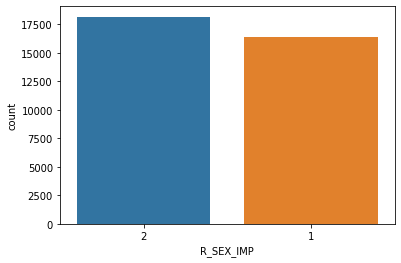

In [17]:
# Check Gender & Age
# cat_col_prop(cleaned_person,'R_AGE')
#cat_col_prop(cleaned_person,'R_AGE_IMP')
cat_col_prop(cleaned_person,'R_SEX_IMP')

For age, gender, the _impute do not have NA values, hence these columns will be used for the aggregation. Mean will be used for the age, while a gender ratio will be used for R_SEX_IMP

## Mean Age - Metric 1

           counts  percentage
65.000000     330    1.921062
64.000000     308    1.792991
66.000000     305    1.775527
67.000000     305    1.775527
68.000000     292    1.699849
...           ...         ...
27.166667       1    0.005821
15.250000       1    0.005821
28.200000       1    0.005821
20.285714       1    0.005821
14.750000       1    0.005821

[518 rows x 2 columns]


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


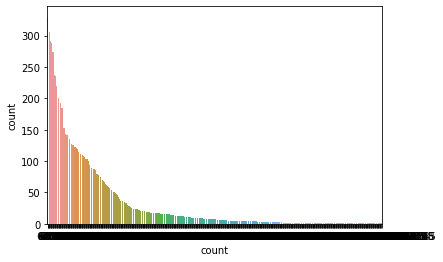

In [22]:
#cleaned_person = cleaned_person.drop(columns=['R_AGE','R_SEX'])
# mean_age
mean_age = cleaned_person.groupby(['HOUSEID'])["R_AGE_IMP"].mean().reset_index(name="count")
mean_age

cat_col_prop(mean_age, 'count')

# have to bin it later

## Percentage of Male Adults - Metric 2

          counts  percentage
0.500000    7236   54.951397
1.000000    2548   19.349939
0.333333    1206    9.158566
0.666667     816    6.196841
0.250000     523    3.971750
0.750000     268    2.035237
0.400000     207    1.571993
0.600000     125    0.949271
0.200000     109    0.827764
0.800000      44    0.334143
0.166667      19    0.144289
0.285714      17    0.129101
0.428571      11    0.083536
0.571429       9    0.068348
0.375000       7    0.053159
0.714286       5    0.037971
0.833333       5    0.037971
0.142857       4    0.030377
0.625000       3    0.022783
0.222222       1    0.007594
0.300000       1    0.007594
0.555556       1    0.007594
0.444444       1    0.007594
0.363636       1    0.007594
0.857143       1    0.007594


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


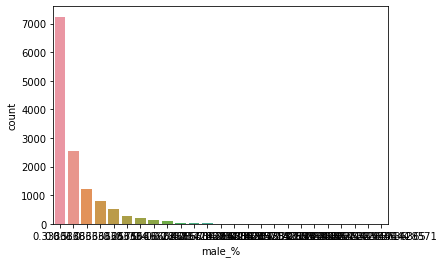

In [23]:
# gender ratio - % male adults 
male = cleaned_person.groupby(['HOUSEID','R_SEX_IMP','HHSIZE'])["R_SEX_IMP"].count().reset_index(name="count") # get the gender size
male = male[male['R_SEX_IMP'] == 1]
male['male_%'] = male['count']/male['HHSIZE']
cat_col_prop(male,'male_%')

      counts  percentage
0.5     7236   54.951397
1       2548   19.349939
<0.5    2107   16.000911
>0.5    1277    9.697752


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


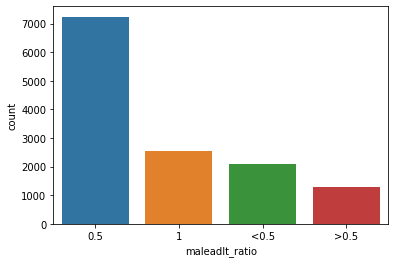

In [24]:
male['maleadlt_ratio'] = 'NA'
male.loc[male['male_%'].between(0,0.5,inclusive = False),'maleadlt_ratio'] = '<0.5'
male.loc[male['male_%'].between(0.5,1, inclusive = False),'maleadlt_ratio'] = '>0.5'
male.loc[male['male_%']==1,'maleadlt_ratio'] ='1'
male.loc[male['male_%']==0.5,'maleadlt_ratio'] ='0.5'
cat_col_prop(male,'maleadlt_ratio')

In [16]:
cleaned_person

,HOUSEID,PERSONID,R_AGE,EDUC,R_SEX,GT1JBLWK,WRK_HOME,WKFTPT,WRKTRANS,OCCAT,SCHTYP,NWALKTRP,NBIKETRP,BIKE4EX,BIKESHARE,PTUSED,MCUSED,CARSHARE,RIDESHARE,CARRODE,TIMETOWK,NOCONG,PUBTIME,WRKTIME,WKRMHM,FLEXTIME,WKFMHMXX,SCHTRN1,SCHTRN2,HEALTH,PHYACT,VPACT,LPACT,WORKER,CNTTDTR,GCDWORK,WKSTFIPS,DISTTOWK17,DISTTOSC17,R_AGE_IMP,R_SEX_IMP,ALT_16,ALT_23,ALT_45,TRAVDAY,HHSIZE
5,30000012,1,45,5,2,2,2,1,3,4,-1,6,0,-1,-1,0,-1,0,0,1,30,12,-1,07:30 AM,2,2,-1,-1,-1,2,3,7,-1,1,9,4.60,36,6.82,-9.00,45,2,3,1,3,5,1
16,30000082,1,39,5,2,2,2,1,3,2,-1,3,0,-1,-1,0,-1,0,0,1,4,3,-1,08:30 AM,1,1,2,-1,-1,2,2,-1,2,1,5,1.04,36,1.65,-9.00,39,2,1,1,2,3,4
17,30000082,2,38,4,1,2,2,1,3,4,-1,0,0,-1,-1,0,-1,0,0,1,42,36,-1,08:45 AM,1,2,2,-1,-1,2,2,-1,2,1,7,24.35,36,30.04,-9.00,38,1,3,1,3,3,4
27,30000130,1,45,5,2,2,2,1,11,2,-1,5,0,-1,-1,20,-1,0,0,-9,60,-1,10,09:00 AM,2,2,-1,-1,-1,3,2,-1,5,1,4,9.65,36,14.60,-9.00,45,2,3,4,2,1,2
28,30000130,2,45,4,1,2,2,1,11,2,-1,6,0,-1,-1,5,-1,0,0,-9,60,-1,15,09:00 AM,2,2,-1,-1,-1,2,3,6,-1,1,0,11.95,36,20.22,-9.00,45,1,-1,-1,-1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264145,40793808,3,17,1,1,-1,-1,-1,-1,-1,1,7,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,3,3,1,2,-1,2,2,5,-9.00,-9,-9.00,2.17,17,1,4,4,4,7,3
264167,40793974,1,81,2,1,-1,-1,-1,-1,-1,-1,0,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,-1,3,2,7,-9.00,-9,-9.00,-9.00,81,1,2,1,4,3,1
264175,40794020,1,75,3,1,-1,-1,-1,-1,-1,-1,7,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,-1,4,2,6,-9.00,-9,-9.00,-9.00,75,1,4,1,4,3,2
264176,40794020,2,70,2,2,-1,-1,-1,-1,-1,-1,7,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,2,-1,7,2,5,-9.00,-9,-9.00,-9.00,70,2,4,1,4,3,2


In [26]:
# drop physical activity 
#cleaned_person = cleaned_person.drop(columns = ['PHYACT','VPACT','LPACT'])
#check WKSTFIPS

#cat_col_prop(cleaned_person,'WKSTFIPS')
# will drop as most of info is -9, will use some other means for work
cleaned_person = cleaned_person.drop(columns = ['WKSTFIPS'])



## MAX EDUC -> highest EDUCATION attained (metrics 3)

    counts  percentage
5     5836   33.973687
3     4433   25.806264
4     3833   22.313424
2     2679   15.595529
1      389    2.264524
NA       8    0.046571


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


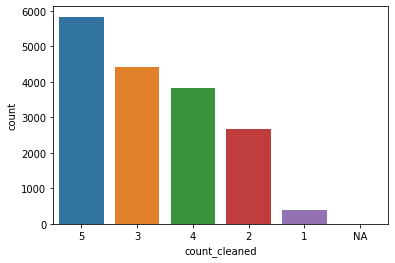

In [27]:
# to prevent the values from affecting the values, max is used 
max_educ = cleaned_person.groupby(['HOUSEID'])["EDUC"].max().reset_index(name="count")
#cat_col_prop(max_educ,'count')
max_educ['count_cleaned'] = max_educ['count'].replace({
-7:"NA"                    })
cat_col_prop(max_educ,'count_cleaned')

In [28]:
cleaned_person

,HOUSEID,PERSONID,R_AGE,EDUC,R_SEX,WRK_HOME,WKFTPT,WRKTRANS,OCCAT,SCHTYP,NWALKTRP,BIKE4EX,PTUSED,RIDESHARE,TIMETOWK,NOCONG,PUBTIME,WRKTIME,WKRMHM,SCHTRN1,SCHTRN2,WORKER,GCDWORK,DISTTOWK17,R_AGE_IMP,R_SEX_IMP,ALT_16,ALT_23,ALT_45,TRAVDAY,HHSIZE
5,30000012,1,45,5,2,2,1,3,4,-1,6,-1,0,0,30,12,-1,07:30 AM,2,-1,-1,1,4.60,6.82,45,2,3,1,3,5,1
16,30000082,1,39,5,2,2,1,3,2,-1,3,-1,0,0,4,3,-1,08:30 AM,1,-1,-1,1,1.04,1.65,39,2,1,1,2,3,4
17,30000082,2,38,4,1,2,1,3,4,-1,0,-1,0,0,42,36,-1,08:45 AM,1,-1,-1,1,24.35,30.04,38,1,3,1,3,3,4
27,30000130,1,45,5,2,2,1,11,2,-1,5,-1,20,0,60,-1,10,09:00 AM,2,-1,-1,1,9.65,14.60,45,2,3,4,2,1,2
28,30000130,2,45,4,1,2,1,11,2,-1,6,-1,5,0,60,-1,15,09:00 AM,2,-1,-1,1,11.95,20.22,45,1,-1,-1,-1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264145,40793808,3,17,1,1,-1,-1,-1,-1,1,7,-1,0,0,-1,-1,-1,-1,-1,3,3,2,-9.00,-9.00,17,1,4,4,4,7,3
264167,40793974,1,81,2,1,-1,-1,-1,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,2,-9.00,-9.00,81,1,2,1,4,3,1
264175,40794020,1,75,3,1,-1,-1,-1,-1,-1,7,-1,0,0,-1,-1,-1,-1,-1,-1,-1,2,-9.00,-9.00,75,1,4,1,4,3,2
264176,40794020,2,70,2,2,-1,-1,-1,-1,-1,7,-1,0,0,-1,-1,-1,-1,-1,-1,-1,2,-9.00,-9.00,70,2,4,1,4,3,2


## look at travel questions, ALT16, 23, 45, WRKTRANS, SCHTRN2, SCHTRN1

For travel questions, ALT16, 23, 45, WRKTRANS, SCHTRNS, SCHTRN1 will be dropped as they might cause data leakage, e.g. if take a mode to school/work -> car owner or not

     counts  percentage
 0    28166   81.574374
 1      923    2.673193
 2      853    2.470459
 20     751    2.175046
 5      526    1.523401
 4      394    1.141103
 3      380    1.100556
 30     371    1.074490
 10     279    0.808040
 25     239    0.692192
 15     223    0.645853
 6      218    0.631372
 8      163    0.472081
 7      141    0.408364
 22     134    0.388091
 12     121    0.350440
 16      74    0.214319
 18      69    0.199838
 24      65    0.188253
 28      63    0.182461
 26      58    0.167980
 21      56    0.162187
 14      40    0.115848
 17      34    0.098471
-8       30    0.086886
 19      27    0.078197
 9       27    0.078197
 23      26    0.075301
-7       19    0.055028
 27      17    0.049235
 13      15    0.043443
 29      13    0.037651
 11      13    0.037651
     counts  percentage
 0    29727   86.095343
-1     3302    9.563253
 2      386    1.117933
 1      381    1.103452
 3      171    0.495250
 5      131    0.379402
 4      124    0

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


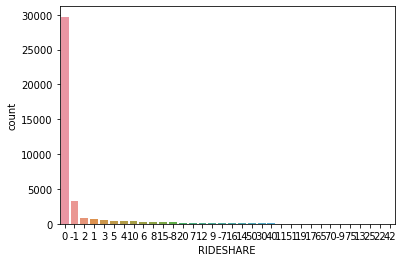

In [33]:


cleaned_person = cleaned_person.drop(columns=['WRKTRANS','SCHTRN2','SCHTRN1','ALT_23','ALT_16','ALT_45'])


# for other trips 
# have to be careful of the negative values 
# walk trip no negative trips
#cat_col_prop(cleaned_person,'NWALKTRP')

# look at travday 
#cat_col_prop(cleaned_person,'TRAVDAY') # roughly the same, drop

cat_col_prop(cleaned_person,'PTUSED') # roughly the same, drop
cat_col_prop(cleaned_person,'RIDESHARE') # roughly the same, drop



## Look at the work related questions - NOCONG, TIMETOWK, OCCAT, PUBTIME, WKRMHM, WRKTIME, WKFTPT

In [31]:
# work-related information 
cleaned_person = cleaned_person.drop(columns = ['BIKE4EX','TRAVDAY','R_AGE_IMP','R_SEX_IMP','EDUC'])

In [37]:
cleaned_person = cleaned_person.drop(columns = ['NWALKTRP'])

In [35]:
cleaned_person = cleaned_person.drop(columns = ['R_AGE','R_SEX','SCHTYP','PTUSED','RIDESHARE'])

In [38]:
cleaned_person

,HOUSEID,PERSONID,WRK_HOME,WKFTPT,OCCAT,TIMETOWK,NOCONG,PUBTIME,WRKTIME,WKRMHM,WORKER,GCDWORK,DISTTOWK17,HHSIZE
5,30000012,1,2,1,4,30,12,-1,07:30 AM,2,1,4.60,6.82,1
16,30000082,1,2,1,2,4,3,-1,08:30 AM,1,1,1.04,1.65,4
17,30000082,2,2,1,4,42,36,-1,08:45 AM,1,1,24.35,30.04,4
27,30000130,1,2,1,2,60,-1,10,09:00 AM,2,1,9.65,14.60,2
28,30000130,2,2,1,2,60,-1,15,09:00 AM,2,1,11.95,20.22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264145,40793808,3,-1,-1,-1,-1,-1,-1,-1,-1,2,-9.00,-9.00,3
264167,40793974,1,-1,-1,-1,-1,-1,-1,-1,-1,2,-9.00,-9.00,1
264175,40794020,1,-1,-1,-1,-1,-1,-1,-1,-1,2,-9.00,-9.00,2
264176,40794020,2,-1,-1,-1,-1,-1,-1,-1,-1,2,-9.00,-9.00,2


for NOCONG and TIMETOWK, it is the same so choose one, same as DISTTOWK17 and GDWORK


    counts  percentage
-1   18274   52.925162
 1   12523   36.269115
 2    3721   10.776761
-7       8    0.023170
-8       2    0.005792


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


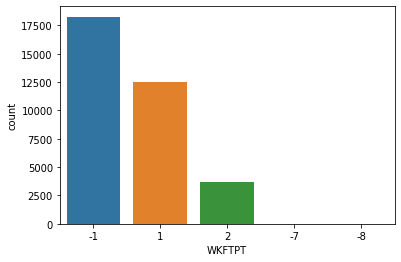

In [39]:
cat_col_prop(cleaned_person,'WKFTPT') 

# check for -1 if they are not workers 
people = cleaned_person[cleaned_person['WKFTPT'] == -1]
# not working -> could mean they are schooling as well 


In [40]:
#FT = cleaned_person.groupby(['HOUSEID','WKFTPT','HHSIZE'])["WKFTPT"].count().reset_index(name="count")

FT_max = cleaned_person.groupby(['HOUSEID','HHSIZE'])["WKFTPT"].max().reset_index(name="count")

non_working = pd.DataFrame(FT_max[FT_max['count'] == -1])

FT = cleaned_person.groupby(['HOUSEID','WKFTPT','HHSIZE'])["WKFTPT"].count().reset_index(name="count")
non_working_HH = non_working['HOUSEID'].tolist()
working = FT[-FT['HOUSEID'].isin(non_working_HH)]
working = working[working['WKFTPT']>0]
working['FT_ratio'] = np.where(working['WKFTPT']==2, 0, working['count']/working['HHSIZE'])
FT_cleaned = working.groupby(['HOUSEID','HHSIZE'])["FT_ratio"].sum().reset_index(name="count")
FT_cleaned

NA = FT_max[FT_max['count'] <-1]
display(NA)
display(non_working)
display(FT_cleaned)

,HOUSEID,HHSIZE,count
2554,30160648,1,-7
4268,30264949,1,-7
6541,30401603,1,-8


,HOUSEID,HHSIZE,count
15,30001011,2,-1
16,30001039,1,-1
17,30001053,3,-1
20,30001349,3,-1
21,30001381,2,-1
...,...,...,...
17160,40792021,2,-1
17173,40793685,2,-1
17175,40793974,1,-1
17176,40794020,2,-1


,HOUSEID,HHSIZE,count
0,30000012,1,1.000000
1,30000082,4,0.500000
2,30000130,2,1.000000
3,30000380,3,0.333333
4,30000434,2,0.500000
...,...,...,...
10622,40792952,5,0.200000
10623,40793204,2,0.000000
10624,40793555,8,0.375000
10625,40793669,4,0.250000


In [43]:
#cat_col_prop(cleaned_person,'OCCAT') 
# split the categories up 
OCCAT = cleaned_person.groupby(['HOUSEID','OCCAT','HHSIZE'])["OCCAT"].count().reset_index(name="count")
OCCAT['2_ratio'] = np.where(OCCAT['OCCAT'].isin([2]), OCCAT['count']/OCCAT['HHSIZE'], 0)
OCCAT['1_ratio'] = np.where(OCCAT['OCCAT'].isin([1]), OCCAT['count']/OCCAT['HHSIZE'], 0)
OCCAT['3_ratio'] = np.where(OCCAT['OCCAT'].isin([3]), OCCAT['count']/OCCAT['HHSIZE'], 0)
OCCAT['4_ratio'] = np.where(OCCAT['OCCAT'].isin([4]), OCCAT['count']/OCCAT['HHSIZE'], 0)
OCCAT['97_ratio'] = np.where(OCCAT['OCCAT'].isin([97]), OCCAT['count']/OCCAT['HHSIZE'], 0)
OCCAT['NA_ratio'] = np.where(OCCAT['OCCAT'].isin([-7,-8]), OCCAT['count']/OCCAT['HHSIZE'], 0)
OCCAT['NOTWRK_ratio'] = np.where(OCCAT['OCCAT'].isin([-1,-9]), OCCAT['count']/OCCAT['HHSIZE'], 0)


#OCCAT_working['prof_ratio'] = np.where(OCCAT_working['OCCAT'].isin([2,3,1,97]), 0, OCCAT_working['count']/OCCAT_working['HHSIZE'])
#OCCAT_working['prof_ratio'] = np.where(OCCAT_working['OCCAT'].isin([2,3,1,97]), 0, OCCAT_working['count']/OCCAT_working['HHSIZE'])
#OCCAT_working['prof_ratio'] = np.where(OCCAT_working['OCCAT'].isin([2,3,1,97]), 0, OCCAT_working['count']/OCCAT_working['HHSIZE'])
#OCCAT_working['prof_ratio'] = np.where(OCCAT_working['OCCAT'].isin([2,3,1,97]), 0, OCCAT_working['count']/OCCAT_working['HHSIZE'])


OCCAT_cleaned = OCCAT.groupby(['HOUSEID','HHSIZE'])['1_ratio','2_ratio','3_ratio','4_ratio','97_ratio','NOTWRK_ratio','NA_ratio'].sum().reset_index()
OCCAT_cleaned






/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,HOUSEID,HHSIZE,1_ratio,2_ratio,3_ratio,4_ratio,97_ratio,NOTWRK_ratio,NA_ratio
0,30000012,1,0.000000,0.00,0.0,1.000000,0.0,0.000000,0.0
1,30000082,4,0.000000,0.25,0.0,0.250000,0.0,0.000000,0.0
2,30000130,2,0.000000,1.00,0.0,0.000000,0.0,0.000000,0.0
3,30000380,3,0.333333,0.00,0.0,0.000000,0.0,0.666667,0.0
4,30000434,2,0.000000,0.00,0.0,1.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
17173,40793685,2,0.000000,0.00,0.0,0.000000,0.0,1.000000,0.0
17174,40793808,3,0.000000,0.00,0.0,0.666667,0.0,0.333333,0.0
17175,40793974,1,0.000000,0.00,0.0,0.000000,0.0,1.000000,0.0
17176,40794020,2,0.000000,0.00,0.0,0.000000,0.0,1.000000,0.0


     counts  percentage
-1    17584   50.926784
 4     8906   25.793559
 1     3517   10.185936
 3     1950    5.647590
 2     1853    5.366659
-9      690    1.998378
 97      20    0.057924
-8        5    0.014481
-7        3    0.008689
-1 and -9 sum up to the -1 in WKFTPT.


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


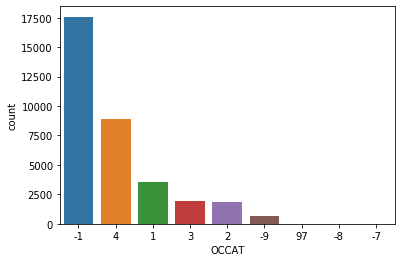

In [44]:
cat_col_prop(cleaned_person,'OCCAT') 
print('-1 and -9 sum up to the -1 in WKFTPT.')

    counts  percentage
 1   16944   49.073216
 2   14280   41.357739
-1    3302    9.563253
-9       2    0.005792


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


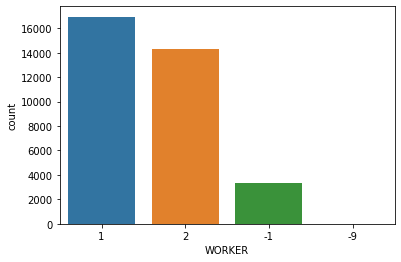

In [46]:
cat_col_prop(cleaned_person,'WORKER') 
# -1 could mean
# not sure what -1 represent

cleaned_person = cleaned_person.drop(columns = ['WORKER'])

     counts  percentage
-1    33276   96.373957
 0      449    1.300394
 10     196    0.567655
 5      131    0.379402
 15     119    0.344648
 20     110    0.318582
 30      47    0.136121
 60      37    0.107159
 3       23    0.066613
 2       22    0.063716
 25      17    0.049235
 7       13    0.037651
 45      12    0.034754
 40      10    0.028962
 1       10    0.028962
-8        9    0.026066
-9        8    0.023170
 4        8    0.023170
 8        7    0.020273
 35       5    0.014481
 6        4    0.011585
 50       4    0.011585
 12       3    0.008689
 14       1    0.002896
-7        1    0.002896
 24       1    0.002896
 32       1    0.002896
 55       1    0.002896
 9        1    0.002896
 17       1    0.002896
 16       1    0.002896


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


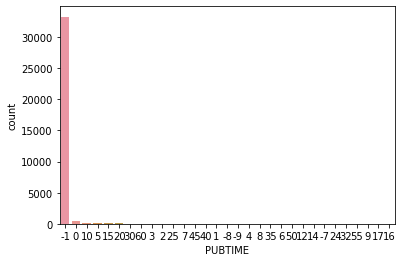

In [49]:
cat_col_prop(cleaned_person,'PUBTIME') 
# high % of -1 in PUBTIME -> dropped

cleaned_person = cleaned_person.drop(columns = ['PUBTIME'])

In [51]:
cleaned_person['TIMETOWK'].value_counts()
# this might mean that they do not need to travel out for work, which can be seen in time to work

time = cleaned_person[['HOUSEID','PERSONID','TIMETOWK']].copy()

In [55]:
positive_time = time[time['TIMETOWK']>=0]
mean_time = positive_time.groupby('HOUSEID')['TIMETOWK'].mean().reset_index()
positive_HH_IDs = mean_time['HOUSEID'].to_list()
negative_time = time[time['TIMETOWK']<0]
negative_time =negative_time[-negative_time['HOUSEID'].isin(positive_HH_IDs)]
mean_time
display(negative_check[negative_check['TIMETOWK'] == -1]) # put them as NOT WRK
display(negative_check[negative_check['TIMETOWK'] == -9]) # put them as NA-7,-8

,HOUSEID,TIMETOWK
0,30000012,30.00
1,30000082,23.00
2,30000130,60.00
3,30000380,10.00
4,30000434,25.00
...,...,...
9757,40792952,20.00
9758,40793204,10.00
9759,40793555,48.75
9760,40793669,4.00


In [59]:
negative_check = negative_time.groupby('HOUSEID')['TIMETOWK'].min().reset_index()
display(negative_check[negative_check['TIMETOWK'] == -1]) # put them as NOT WRK
display(negative_check[negative_check['TIMETOWK'] == -9]) # put them as NA-7,-8

,HOUSEID,TIMETOWK
0,30000496,-1
1,30000817,-1
2,30001011,-1
3,30001039,-1
4,30001053,-1
...,...,...
7411,40792021,-1
7412,40793685,-1
7413,40793974,-1
7414,40794020,-1


,HOUSEID,TIMETOWK


            counts  percentage
15.000000      992   10.161852
20.000000      956    9.793075
10.000000      738    7.559926
30.000000      710    7.273100
25.000000      614    6.289695
...            ...         ...
12.666667        1    0.010244
2.666667         1    0.010244
103.500000       1    0.010244
26.250000        1    0.010244
48.750000        1    0.010244

[291 rows x 2 columns]


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


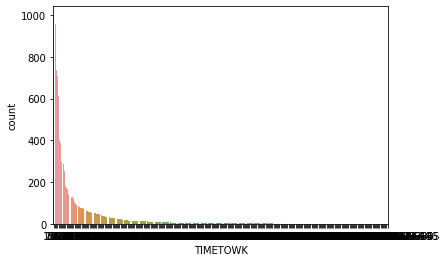

In [60]:
cat_col_prop(mean_time,'TIMETOWK') 

In [61]:
bins = [0, 10, 20, 30, 3000]
bins_label = ['<=10','10 - 20','20 - 30','>30']
mean_time['binned'] = pd.cut(mean_time['TIMETOWK'], bins, labels = bins_label,include_lowest=True)



In [62]:
cleaned_person[cleaned_person['WRKTIME']=='-7']

,HOUSEID,PERSONID,WRK_HOME,WKFTPT,OCCAT,TIMETOWK,NOCONG,WRKTIME,WKRMHM,GCDWORK,DISTTOWK17,HHSIZE
6332,30025610,2,1,1,4,-1,-1,-7,-1,-9.00,-9.00,2
17773,30070435,1,2,-7,1,0,-1,-7,-7,8.30,12.03,4
19720,30078137,1,1,2,4,-1,-1,-7,-1,-9.00,-9.00,2
22405,30088919,1,2,1,4,12,10,-7,2,3.97,6.62,1
22813,30090538,1,2,1,4,1,-1,-7,1,3.20,4.31,2
...,...,...,...,...,...,...,...,...,...,...,...,...
250796,40707442,1,1,2,4,-1,-1,-7,-1,-9.00,-9.00,2
251763,40713153,1,1,-7,4,-1,-1,-7,-1,-9.00,-9.00,4
254066,40727377,2,1,1,4,-1,-1,-7,-1,-9.00,-9.00,2
254570,40730607,2,1,1,2,-1,-1,-7,-1,-9.00,-9.00,2


In [63]:
start_time = cleaned_person[['HOUSEID','PERSONID','WRKTIME']].copy()
start_time['WRKTIME_AMPM'] = start_time['WRKTIME'].apply(lambda x: (str(x[-2:])))
start_time['WRKTIME_HOUR'] = start_time['WRKTIME'].apply(lambda x: int(str(x[:2])))
start_time['WRKTIME_HOUR_cleaned'] = np.where(start_time['WRKTIME_AMPM'] == 'PM',start_time['WRKTIME_HOUR'] + 12, start_time['WRKTIME_HOUR'])
start_time['WRKTIME_HOUR_cleaned'] = np.where(start_time['WRKTIME_HOUR'] == 12,start_time['WRKTIME_HOUR'], start_time['WRKTIME_HOUR_cleaned'])
start_time[start_time['WRKTIME_AMPM'] == 'PM']

,HOUSEID,PERSONID,WRKTIME,WRKTIME_AMPM,WRKTIME_HOUR,WRKTIME_HOUR_cleaned
78,30000380,2,06:00 PM,PM,6,18
94,30000439,4,04:00 PM,PM,4,16
641,30002883,3,12:00 PM,PM,12,12
659,30002989,2,01:00 PM,PM,1,13
776,30003489,1,02:50 PM,PM,2,14
...,...,...,...,...,...,...
263464,40789044,5,05:00 PM,PM,5,17
263537,40789513,2,04:00 PM,PM,4,16
263771,40791091,2,05:45 PM,PM,5,17
264028,40792952,4,05:00 PM,PM,5,17


In [64]:
# 17584 corresponds to OCCAT
# None from -7,-8

earliest_time = start_time.groupby(['HOUSEID','WRKTIME_HOUR_cleaned']).count().reset_index()
earliest_time

,HOUSEID,WRKTIME_HOUR_cleaned,PERSONID,WRKTIME,WRKTIME_AMPM,WRKTIME_HOUR
0,30000012,7,1,1,1,1
1,30000082,8,2,2,2,2
2,30000130,9,2,2,2,2
3,30000380,-1,2,2,2,2
4,30000380,18,1,1,1,1
...,...,...,...,...,...,...
26899,40793808,7,1,1,1,1
26900,40793808,9,1,1,1,1
26901,40793974,-1,1,1,1,1
26902,40794020,-1,2,2,2,2


In [69]:
time_plus = earliest_time[earliest_time['WRKTIME_HOUR_cleaned']>=0]
early_start = time_plus.groupby(['HOUSEID'])['WRKTIME_HOUR_cleaned'].min().reset_index()
early_start_ids = early_start['HOUSEID'].to_list()
early_start

,HOUSEID,WRKTIME_HOUR_cleaned
0,30000012,7
1,30000082,8
2,30000130,9
3,30000380,18
4,30000434,8
...,...,...
10479,40792952,8
10480,40793204,14
10481,40793555,6
10482,40793669,8


In [71]:
negative_sttime = earliest_time[earliest_time['WRKTIME_HOUR_cleaned'] < 0]
negative_sttime = negative_sttime[-negative_sttime['HOUSEID'].isin(early_start_ids)]
negative_sttime

,HOUSEID,WRKTIME_HOUR_cleaned,PERSONID,WRKTIME,WRKTIME_AMPM,WRKTIME_HOUR
25,30001011,-1,2,2,2,2
26,30001039,-1,1,1,1,1
27,30001053,-1,2,2,2,2
33,30001349,-9,1,1,1,1
34,30001349,-1,2,2,2,2
...,...,...,...,...,...,...
26866,40792021,-1,2,2,2,2
26897,40793685,-1,2,2,2,2
26901,40793974,-1,1,1,1,1
26902,40794020,-1,2,2,2,2


In [78]:
negative_sttime = negative_sttime.groupby(['HOUSEID'])['WRKTIME_HOUR_cleaned'].min().reset_index()
display(negative_sttime[negative_sttime['WRKTIME_HOUR_cleaned'] == -1])
display(negative_sttime[negative_sttime['WRKTIME_HOUR_cleaned'] == -9]) # -7,-8,-9
early_start

,HOUSEID,WRKTIME_HOUR_cleaned
0,30001011,-1
1,30001039,-1
2,30001053,-1
4,30001381,-1
5,30001456,-1
...,...,...
6689,40792021,-1
6690,40793685,-1
6691,40793974,-1
6692,40794020,-1


,HOUSEID,WRKTIME_HOUR_cleaned
3,30001349,-9
42,30008251,-9
68,30012338,-9
74,30013015,-9
77,30013369,-9
...,...,...
6383,40718101,-9
6538,40756807,-9
6549,40758953,-9
6552,40759946,-9


In [197]:
early_start

,HOUSEID,WRKTIME_HOUR_cleaned
0,30000012,7
1,30000082,8
2,30000130,9
3,30000380,18
4,30000434,8
...,...,...
10479,40792952,8
10480,40793204,14
10481,40793555,6
10482,40793669,8


    counts  percentage
-1   20090   58.184662
 2   11934   34.563253
 1    2486    7.199954
-7      11    0.031858
-8       7    0.020273


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


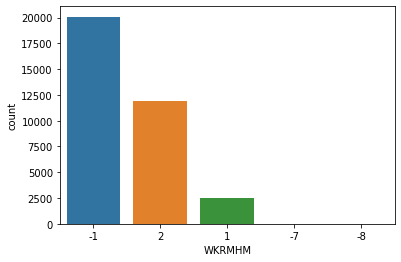

In [199]:
cat_col_prop(cleaned_person,'WKRMHM') 

In [80]:
flex = cleaned_person[['HOUSEID','PERSONID','WRK_HOME','HHSIZE']].copy()
flex_grouped = flex.groupby(['HOUSEID','WRK_HOME','HHSIZE']).count().reset_index()

In [81]:
flex_grouped

,HOUSEID,WRK_HOME,HHSIZE,PERSONID
0,30000012,2,1,1
1,30000082,2,4,2
2,30000130,2,2,2
3,30000380,-1,3,2
4,30000380,2,3,1
...,...,...,...,...
23534,40793808,1,3,1
23535,40793808,2,3,1
23536,40793974,-1,1,1
23537,40794020,-1,2,2


In [93]:
flex_plus_max = flex_grouped[flex_grouped['WRK_HOME']>0]
flex_plus_max['yes_wfh'] = np.where(flex_plus_max['WRK_HOME'] == 2,0, flex_plus_max['PERSONID']/flex_plus_max['HHSIZE'] )

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [94]:
flex_plus_max

,HOUSEID,WRK_HOME,HHSIZE,PERSONID,yes_wfh
0,30000012,2,1,1,0.000000
1,30000082,2,4,2,0.000000
2,30000130,2,2,2,0.000000
4,30000380,2,3,1,0.000000
5,30000434,1,2,1,0.500000
...,...,...,...,...,...
23527,40793204,2,2,1,0.000000
23529,40793555,2,8,4,0.000000
23531,40793669,2,4,2,0.000000
23534,40793808,1,3,1,0.333333


In [122]:
flex_HH = flex_plus_max.groupby(['HOUSEID'])["yes_wfh"].sum().reset_index(name="count") 
flex_negative = flex_grouped[flex_grouped['WRK_HOME']<0]
flex_HH_ID = flex_HH['HOUSEID'].to_list()

flex_negative = flex_negative[-flex_negative['HOUSEID'].isin(flex_HH_ID)]
flex_min = flex_negative.groupby(['HOUSEID'])["WRK_HOME"].max().reset_index(name="count") 

flex_min

,HOUSEID,count
0,30001011,-1
1,30001039,-1
2,30001053,-1
3,30001349,-1
4,30001381,-1
...,...,...
6542,40792021,-1
6543,40793685,-1
6544,40793974,-1
6545,40794020,-1


In [103]:
flex_HH
flex_min

,HOUSEID,count
0,30000012,0.000000
1,30000082,0.000000
2,30000130,0.000000
3,30000380,0.000000
4,30000434,0.500000
...,...,...
10626,40792952,0.000000
10627,40793204,0.000000
10628,40793555,0.000000
10629,40793669,0.000000


In [106]:
#cat_col_prop(cleaned_person,'DISTTOWK17')
dist = cleaned_person[['HOUSEID','PERSONID','DISTTOWK17']].copy()
dist_plus = dist[dist['DISTTOWK17']>=0]
average_dist = dist_plus.groupby(['HOUSEID'])['DISTTOWK17'].mean().reset_index(name="count") 
average_dist_IDs = average_dist['HOUSEID'].tolist()

In [107]:
dist_minus = dist[dist['DISTTOWK17']<0]
dist_minus = dist_minus[-dist_minus['HOUSEID'].isin(average_dist_IDs)]
dist_minus = dist_minus.groupby(['HOUSEID'])['DISTTOWK17'].min().reset_index(name="count") 
dist_minus

,HOUSEID,count
0,30000496,-9.0
1,30000817,-9.0
2,30001011,-9.0
3,30001039,-9.0
4,30001053,-9.0
...,...,...
7401,40792021,-9.0
7402,40793685,-9.0
7403,40793974,-9.0
7404,40794020,-9.0


               counts  percentage
>15 miles        3174   32.480557
<=5 miles        2833   28.990995
5-10 miles       2228   22.799836
10 - 15 miles    1537   15.728612


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


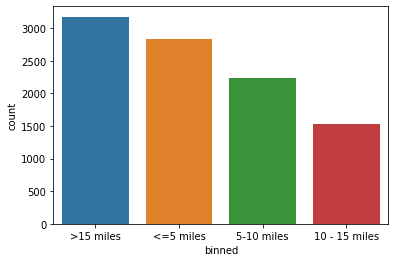

In [108]:
dist_bins = [0, 5, 10, 15, 3000]
dist_bins_label = ['<=5 miles','5-10 miles','10 - 15 miles','>15 miles']
average_dist['binned'] = pd.cut(average_dist['count'], dist_bins, labels = dist_bins_label,include_lowest=True)

cat_col_prop(average_dist,'binned')


In [110]:
cleaned_person = cleaned_person.drop(columns = ['NOCONG','GCDWORK','WKRMHM'])

## Treatment of all selected metrics

           counts  percentage
65.000000     330    1.921062
64.000000     308    1.792991
66.000000     305    1.775527
67.000000     305    1.775527
68.000000     292    1.699849
...           ...         ...
27.166667       1    0.005821
15.250000       1    0.005821
28.200000       1    0.005821
20.285714       1    0.005821
14.750000       1    0.005821

[518 rows x 2 columns]


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


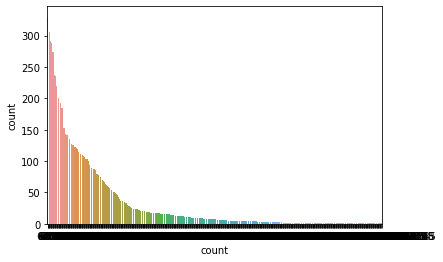

In [125]:
# mean age
mean_age
cat_col_prop(mean_age,'count')

         counts  percentage
>60        7738   45.045989
50 - 60    2885   16.794737
30 - 40    2426   14.122715
<=30       2306   13.424147
40 - 50    1823   10.612411


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


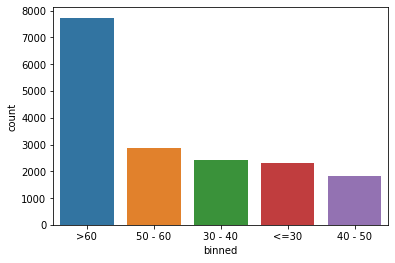

In [134]:
bins = [0, 30, 40, 50, 60, 100]
bins_label = ['<=30','30 - 40','40 - 50','50 - 60','>60']
mean_age['binned'] = pd.cut(mean_age['count'], bins, labels = bins_label,include_lowest=True)


cat_col_prop(mean_age,'binned')



In [228]:
# consolidation of features
mean_age_final = mean_age[['HOUSEID','binned']].copy()
mean_age_final = mean_age_final.rename(columns={'binned':'AVG_AGE'})

# max EDUC
max_educ_final = max_educ[['HOUSEID','count_cleaned']].copy()
max_educ_final = max_educ_final.rename(columns={'count_cleaned':'HIGH_EDUC'})

# FT
FT_final = pd.concat([FT_cleaned_im, NA_im, non_working_im])


# average_work_dist
average_dist_final = pd.concat([average_dist_im,dist_minus_im])
average_dist_final = average_dist_final.rename(columns={'binned':'AVG_WORK_DIST'})

# Time to work
time_final = pd.concat([negative_check_im,mean_time_im])
time_final = time_final.rename(columns ={'binned':'AVG_TIME'})


In [239]:
full_df = mean_age_final.merge(max_educ_final, on = 'HOUSEID', how = 'left')
full_df = full_df.merge(FT_final, on = 'HOUSEID', how = 'left')
full_df = full_df.merge(average_dist_final, on = 'HOUSEID', how = 'left')
full_df = full_df.merge(time_final, on = 'HOUSEID', how = 'left')




In [246]:
household_df = pd.read_csv('final_HH.csv')
household_pluswj = household_df.merge(full_df, on = 'HOUSEID', how = 'left')

household_pluswj.to_csv('Households + WJ Variables.csv')

In [241]:
# no need to change
full_df.to_csv('personal_agg_wj.csv')

          counts  percentage
1.000000    3514   33.066717
0.500000    2629   24.738873
0.000000    1682   15.827609
0.333333     899    8.459584
0.666667     666    6.267056
0.250000     618    5.815376
0.200000     215    2.023149
0.400000     172    1.618519
0.166667      71    0.668110
0.750000      70    0.658700
0.600000      23    0.216430
0.142857      22    0.207020
0.285714      12    0.112920
0.125000      11    0.103510
0.800000       9    0.084690
0.428571       5    0.047050
0.100000       2    0.018820
0.111111       2    0.018820
0.375000       2    0.018820
0.714286       1    0.009410
0.222222       1    0.009410
0.571429       1    0.009410


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


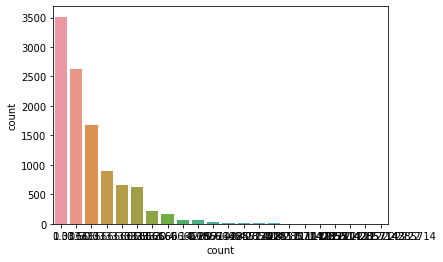

In [140]:
# WKFTPT
cat_col_prop(FT_cleaned,'count')

      counts  percentage
1       3514   33.066717
0.5     2629   24.738873
<0.5    2032   19.121107
0       1682   15.827609
>0.5     770    7.245695


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  """
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


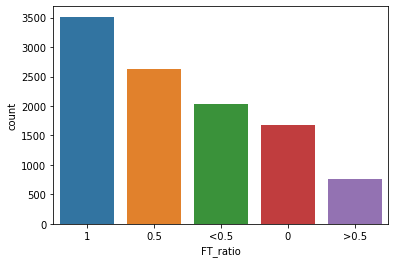

In [145]:
FT_cleaned['FT_ratio'] = 'NA'
FT_cleaned.loc[FT_cleaned['count']==0,'FT_ratio']= '0'
FT_cleaned.loc[FT_cleaned['count']==0.5,'FT_ratio']= '0.5'
FT_cleaned.loc[FT_cleaned['count'].between(0,0.5,inclusive = False),'FT_ratio'] = '<0.5'
FT_cleaned.loc[FT_cleaned['count'].between(0.5,1, inclusive = False),'FT_ratio'] = '>0.5'
FT_cleaned.loc[FT_cleaned['count']==1,'FT_ratio'] ='1'

cat_col_prop(FT_cleaned,'FT_ratio')

In [147]:
NA['FT_ratio'] = 'NA'
non_working['FT_ratio'] = 'non-work'


,HOUSEID,HHSIZE,count,FT_ratio
2554,30160648,1,NA,NA
4268,30264949,1,NA,NA
6541,30401603,1,NA,NA


In [184]:
FT_cleaned_im = FT_cleaned[["HOUSEID",'FT_ratio']]
NA_im = NA[['HOUSEID','FT_ratio']]
non_working_im = non_working[['HOUSEID','FT_ratio']]

In [209]:
mean_time_im = mean_time[['HOUSEID','binned']].copy()
mean_time_im

,HOUSEID,binned
0,30000012,20 - 30
1,30000082,20 - 30
2,30000130,>30
3,30000380,<=10
4,30000434,20 - 30
...,...,...
9757,40792952,10 - 20
9758,40793204,<=10
9759,40793555,>30
9760,40793669,<=10


In [210]:
negative_check['binned'] = negative_check['TIMETOWK'].apply(lambda x: 'NA' if x < -1 else 'non-work')
negative_check_im = negative_check[['HOUSEID','binned']].copy()



,HOUSEID,binned
0,30000496,non-work
1,30000817,non-work
2,30001011,non-work
3,30001039,non-work
4,30001053,non-work
...,...,...
9757,40792952,10 - 20
9758,40793204,<=10
9759,40793555,>30
9760,40793669,<=10


          counts  percentage
0.000000   14131   82.262196
0.500000    1110    6.461753
1.000000     657    3.824659
0.333333     524    3.050413
0.250000     375    2.183025
0.200000     136    0.791710
0.666667     102    0.593783
0.166667      47    0.273606
0.400000      37    0.215392
0.750000      16    0.093142
0.142857      14    0.081500
0.600000      13    0.075678
0.125000       6    0.034928
0.100000       4    0.023286
0.428571       2    0.011643
0.800000       2    0.011643
0.222222       1    0.005821
0.111111       1    0.005821


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


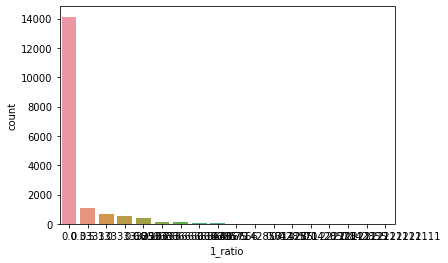

In [156]:
cat_col_prop(OCCAT_cleaned,'1_ratio')
#OCCAT_cleaned 
#not useful as 0 forms the majority of all the respective job categories

    counts  percentage
7     2871   27.384586
8     2849   27.174742
9     1432   13.658909
6     1403   13.382297
5      456    4.349485
10     418    3.987028
11     136    1.297215
14     128    1.220908
4      117    1.115986
15     109    1.039680
12     104    0.991988
13      86    0.820298
16      83    0.791683
17      64    0.610454
3       48    0.457841
18      39    0.371995
22      35    0.333842
23      29    0.276612
21      21    0.200305
19      18    0.171690
2       17    0.162152
20      11    0.104922
1        9    0.085845
0        1    0.009538


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


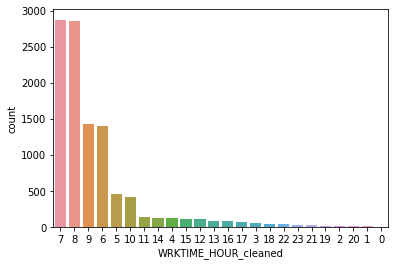

In [167]:
cat_col_prop(early_start,'WRKTIME_HOUR_cleaned')

                 counts  percentage
morning            9011   85.950019
lunch               554    5.284243
early afternoon     427    4.072873
wee hours           192    1.831362
night               153    1.459367
late afternoon      147    1.402137


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.

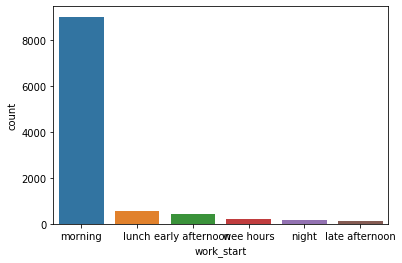

In [169]:
early_start['work_start'] = 'NA'
early_start.loc[early_start['WRKTIME_HOUR_cleaned'].between(0,4,inclusive = True),'work_start'] = 'wee hours'
early_start.loc[early_start['WRKTIME_HOUR_cleaned'].between(5,9, inclusive = True),'work_start'] = 'morning'
early_start.loc[early_start['WRKTIME_HOUR_cleaned'].between(10,12, inclusive = True),'work_start'] = 'lunch'
early_start.loc[early_start['WRKTIME_HOUR_cleaned'].between(12,15, inclusive = True),'work_start'] = 'early afternoon'
early_start.loc[early_start['WRKTIME_HOUR_cleaned'].between(16,18, inclusive = True),'work_start'] = 'late afternoon'
early_start.loc[early_start['WRKTIME_HOUR_cleaned'].between(18,23, inclusive = True),'work_start'] = 'night'

cat_col_prop(early_start,'work_start')

In [166]:
negative_sttime['binned'] = negative_sttime['WRKTIME_HOUR_cleaned'].apply(lambda x: 'NA' if x < -1 else 'non-work')
negative_sttime

,HOUSEID,WRKTIME_HOUR_cleaned,binned
0,30001011,-1,non-work
1,30001039,-1,non-work
2,30001053,-1,non-work
3,30001349,-9,NA
4,30001381,-1,non-work
...,...,...,...
6689,40792021,-1,non-work
6690,40793685,-1,non-work
6691,40793974,-1,non-work
6692,40794020,-1,non-work


          counts  percentage
0.000000    8988   84.545198
0.500000     714    6.716207
1.000000     376    3.536826
0.333333     230    2.163484
0.250000     200    1.881291
0.200000      54    0.507948
0.666667      36    0.338632
0.166667      13    0.122284
0.400000       7    0.065845
0.142857       6    0.056439
0.125000       3    0.028219
0.750000       2    0.018813
0.600000       1    0.009406
0.285714       1    0.009406
    counts  percentage
0     8988   84.545198
>0    1643   15.454802


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


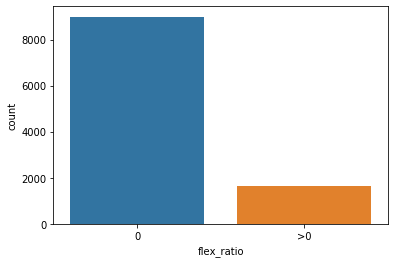

In [174]:
cat_col_prop(flex_HH,'count')

flex_HH['flex_ratio'] = 'NA'
flex_HH.loc[flex_HH['count']==0,'flex_ratio']= '0'
flex_HH.loc[flex_HH['count']>0,'flex_ratio']= '>0'

cat_col_prop(flex_HH,'flex_ratio')

In [171]:
flex_min['binned'] = flex_min['count'].apply(lambda x: 'NA' if x < -1 else 'non-work')
flex_min


,HOUSEID,count,binned
0,30001011,-1,non-work
1,30001039,-1,non-work
2,30001053,-1,non-work
3,30001349,-1,non-work
4,30001381,-1,non-work
...,...,...,...
6542,40792021,-1,non-work
6543,40793685,-1,non-work
6544,40793974,-1,non-work
6545,40794020,-1,non-work


In [197]:
dist_minus['binned'] = 'Not Sure'
dist_minus_im = dist_minus[['HOUSEID','binned']].copy()

In [201]:
average_dist_im = average_dist[['HOUSEID','binned']].copy()
average_dist_im

dist_final = pd.concat([average_dist_im,dist_minus_im])

,HOUSEID,binned
0,30000012,5-10 miles
1,30000082,>15 miles
2,30000130,>15 miles
3,30000380,<=5 miles
4,30000434,>15 miles
...,...,...
7401,40792021,Not Sure
7402,40793685,Not Sure
7403,40793974,Not Sure
7404,40794020,Not Sure
